## Numerical differentiation

The functions I have defined use the numdifftools package,see https://pypi.python.org/pypi/Numdifftools.  The curl, divergence, and laplacian operators, are not explicitly a part of the package (they probably should be), but the package does return the Jacobian matrix of all first-order partial derivatives of a vector-valued function (https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant), and 
the Hessian matrix of second-order partial derivatives of a scalar-valued function (https://en.wikipedia.org/wiki/Hessian_matrix), from which it is easy to compute the desired operators.

Marty Ligare, September 2019

In [2]:
import numpy as np
import numdifftools as nd  # See https://pypi.python.org/pypi/Numdifftools

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

plt.style.use('classic')
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', autolayout = True)  # Adjusts supblot parameters for new size

In [4]:
# Divergence of vector-valued function f evaluated at x
def div(f,x):
    jac = nd.Jacobian(f)(x)
    return jac[0,0] + jac[1,1] + jac[2,2]

In [5]:
# Gradient of scalar-valued function f evaluated at x
def grad(f,x):
    return nd.Gradient(f)(x)

In [6]:
# Curl of vector field f evaluated at x
def curl(f,x):
    jac = nd.Jacobian(f)(x)
    return np.array([jac[2,1]-jac[1,2],jac[0,2]-jac[2,0],jac[1,0]-jac[0,1]])

In [7]:
# Laplacian of scalar field f evaluated at x
def laplacian(f,x):
    hes = nd.Hessdiag(f)(x)
    return sum(hes)

#### Example from documentation
See https://pypi.python.org/pypi/Numdifftools

<IPython.core.display.Javascript object>


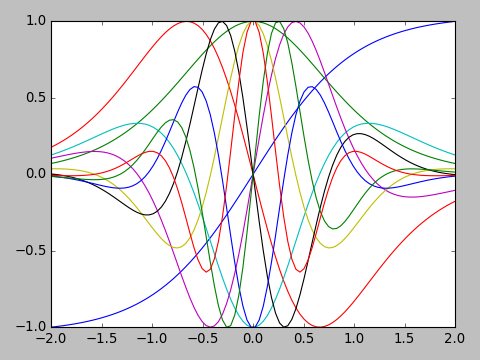

In [8]:
plt.figure(1)
x = np.linspace(-2, 2, 100)
for i in range(10):
    df = nd.Derivative(np.tanh, n=i)
    y = df(x)
    h = plt.plot(x, y/np.absolute(y).max())

#### Scalar function single variable: $\quad f(x) = 4x^3, \quad\left.\frac{df}{dx}\right|_{x_0},\quad\left.\frac{d^2f}{dx^2}\right|_{x_0}$

In [9]:
def f(x):
    return 4*x**3

In [10]:
x0 = 3
d1 = nd.Derivative(f,n=1)  # OR nd.Derivative(f)
d2 = nd.Derivative(f,n=2)
print(d1(x0),d2(x0))

108.00000000000003 72.00000000000017


#### Scalar field (3D): $\quad g({\bf r}) = x^2 + y^3 + 1\left.\quad\nabla g\right|_{{\bf r}_0}\quad \left.\nabla^2g\right|_{{\bf r}_0}$

In [11]:
def g(x):
    return x[0]**2+x[1]**3+1

In [12]:
r0 = np.array([1,2,3])
grad(g,r0)

array([ 2., 12.,  0.])

In [13]:
laplacian(g,r0)

14.000000000000021

#### Vector  field  (3D): $\quad {\bf v}({\bf r})\quad\nabla\cdot {\bf v}\quad \nabla\times{\bf v}$

In [14]:
def v1(x):
    return np.array([x[1]**3,x[0]**2,x[0]])

def v2(x):
    return np.array([x[0]**3*x[2],x[1],x[2]*x[1]])

In [15]:
r0 = np.array([1,2,3])

In [16]:
curl(v1,r0)

array([  0.,  -1., -10.])

In [17]:
div(v1,r0), div(v2,r0)

(0.0, 12.0)

### Version Information 
`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [18]:
%load_ext version_information

In [19]:
version_information numpy, matplotlib, numdifftools

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
matplotlib 3.3.0
numdifftools 0.9.39
Thu Aug 06 17:29:41 2020 EDT